# Assignment 2 - DIY LINEAR REGRESSOR!

*This assignment is a part of the project ["Customer Churn Analysis: From Data To Strategy"]*


1.   ## Part-1
In this part, you'll build your own linear regression from scratch by 2 methods that were discuseed in class.

  * OLS (Ordinary Least Square) - This method directly calculates the values of the coefficients in equation y=mx+c.
  * Gradient Descent - This method uses an iterative approach to calculate the values of the coefficients. You'll have to calculate the values of both m and b.
2.   ## Part-2
In this part, you'll get predictions from the model you just built. You'll then evaluate the predictions by following metrics:

    * [R2 Score](https://www.investopedia.com/terms/r/r-squared.asp)
    * [MEAN ABSOLUTE ERROR and ROOT MEAN SQUARED ERROR](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
3.  ## Part-3
In this part, you'll have to answer some subjective questions.







If you are stuck or have any doubts, please feel free to put your queries on the Whatsapp group.


Deadline : **31 May, 11:59 pm**


# Import necessary libraries
Feel free to modify it as per your requirements.

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part-1


### Linear Regressor with OLS method

In [172]:
class MyLRFromOLS:


  def __init__(self):
      self.m = 0
      self.b = 0

  def fit(self,X_train,y_train):
    mean_X = np.mean(X_train)
    mean_Y = np.mean(y_train)
    #Calculate values of m and b
    numer = 0
    denom = 0
    for i in range(X_train.shape[0]):
      numer = numer + ((int(X_train.iloc[i][0]) - mean_X)*(y_train.iloc[i][0] - mean_Y))
      denom = denom + (int(X_train.iloc[i][0]) - mean_X)**2
    self.m = numer/denom
    self.b = mean_Y - (self.m)*mean_X

  def predict(self,X_test):
    X_test = np.array(X_test)
    return self.m * X_test + (self.b)

  def get_coeff(self):

    #Write code to print the value of m and b
    print(self.m)
    print(self.b)


In [173]:
#load dataset
df = pd.read_csv("tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


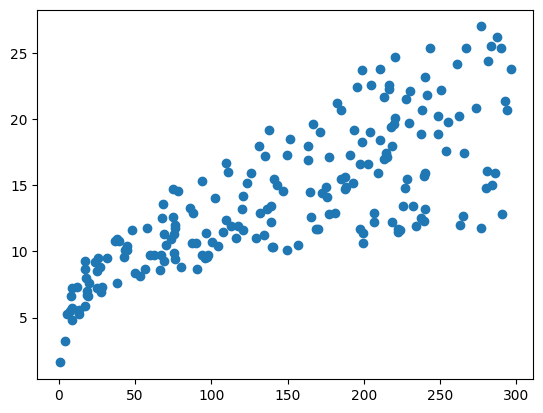

In [174]:
plt.scatter(df['TV'],df['Sales'])

In [175]:
# Separate input and output columns
X = df.loc[:, ['TV']]
y = df.loc[:, ['Sales']]

In [176]:
# Train test split of 80/20. Try changing the ratio and see what results you get

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

  ### Prediction time

In [177]:
olslr = MyLRFromOLS()

In [178]:
olslr.fit(X_train,y_train)

In [179]:
olslr_pred = olslr.predict(X_test)

In [180]:
#View predictions
olslr_pred

array([[15.78361402],
       [10.26967052],
       [ 9.51419206],
       [18.74257133],
       [15.31668636],
       [16.70173021],
       [10.0335835 ],
       [20.34796306],
       [10.50575754],
       [21.81694896],
       [ 7.81436551],
       [17.98709287],
       [11.68094626],
       [ 6.974945  ],
       [18.23367264],
       [ 7.46810455],
       [ 7.88256843],
       [14.51399049],
       [17.56213623],
       [17.27358543],
       [18.54320896],
       [20.35845582],
       [ 9.58239497],
       [ 8.50164106],
       [18.86848441],
       [15.40062841],
       [15.75213575],
       [10.18572847],
       [18.4854988 ],
       [18.31761469],
       [21.08245601],
       [13.44372934],
       [17.04799117],
       [13.71129462],
       [ 6.84903192],
       [12.32625078],
       [18.1234987 ],
       [19.59773098],
       [20.47912252],
       [16.14561411]])

In [181]:
olslr.get_coeff()

0.05246378211478375
6.565727500614585


### Linear Regressor with gradient descent


In [182]:
class MyLRFromGD:

  def __init__(self,learning_rate,epochs):
    self.m = 3/40 #assign random value
    self.b  = 7 #assign random value
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X_train,y_train):
    #calcualte b and m using GD

    def compute_cost(x, y, w, b):
    #number of training examples
      m = x.shape[0]
      total_cost = 0
      for i in range(m):
        f_wb = w*(x.iloc[i][0]) + b
        cost = + (f_wb - y.iloc[i][0])**2
        total_cost = total_cost + (1/(2*m))*(cost)
      return total_cost

    def compute_gradient(x, y, w, b):
    # Number of training examples
      m = x.shape[0]
      dj_dw = 0
      dj_db = 0

      for i in range(m):
        f_wb = w*(x.iloc[i][0]) + b
        dj_dw = dj_dw + (1/m)*(f_wb - y.iloc[i][0])*x.iloc[i][0]
        dj_db = dj_db + (1/m)*(f_wb - y.iloc[i][0])
      return dj_dw, dj_db

    loss_slope_m, loss_slope_b = compute_gradient(X_train, y_train, self.m, self.b)
    log_m = []
    log_b = []
    log_cost = []
    for i in range(self.epochs):
      cost = compute_cost(X_train, y_train, self.m, self.b)
      log_cost.append(cost)
      log_b.append(self.b)
      self.b = self.b - (self.lr * loss_slope_b)
      log_m.append(self.m)
      self.m = self.m - (self.lr * loss_slope_m)
    self. m = log_m[log_cost.index(min(log_cost))]
    self.b = log_b[log_cost.index(min(log_cost))]

  def predict(self,X_test):
    X_test = np.array(X_test)
    return self.m * X_test + self.b

  def get_coeff(self):
    #Write code to get values of m and b
    print(self.m)
    print(self.b)


### Prediction Time
Since we have already split the dataset, we're not going to repeat it again.

In [183]:
#Check with different values of learning_rate and epochs for model convergence
gdlr = MyLRFromGD(0.000001, 1000)

In [184]:
gdlr.fit(X_train, y_train)

In [185]:
gdlr_pred = gdlr.predict(X_test)

In [186]:
# View predictions
gdlr_pred

array([[15.86781136],
       [10.56319791],
       [ 9.83640025],
       [18.71443551],
       [15.41861003],
       [16.7510724 ],
       [10.33607364],
       [20.25888053],
       [10.79032218],
       [21.67209819],
       [ 8.20110553],
       [17.98763785],
       [11.92089631],
       [ 7.39355258],
       [18.22485653],
       [ 7.86798993],
       [ 8.2667192 ],
       [14.64638752],
       [17.57881417],
       [17.30121784],
       [18.52264168],
       [20.26897494],
       [ 9.90201393],
       [ 8.86228951],
       [18.83556845],
       [15.49936532],
       [15.83752812],
       [10.48244261],
       [18.46712242],
       [18.30561183],
       [20.96548936],
       [13.6167575 ],
       [17.08418799],
       [13.87416501],
       [ 7.27241963],
       [12.54170264],
       [18.11886521],
       [19.53713008],
       [20.38506068],
       [16.21606857]])

In [187]:
# Get values of m and b
gdlr.get_coeff()

0.05047205944531251
6.999870511484388


In [188]:
# Compare values of m and b obtained from both methods
print(f"Value of m by OLS Method: {olslr.m}")
print(f"Value of b by OLS Method: {olslr.b}")
print(f"Value of m by GD Method: {gdlr.m}")
print(f"Value of b by GD Method: {gdlr.b}")

Value of m by OLS Method: 0.05246378211478375
Value of b by OLS Method: 6.565727500614585
Value of m by GD Method: 0.05047205944531251
Value of b by GD Method: 6.999870511484388


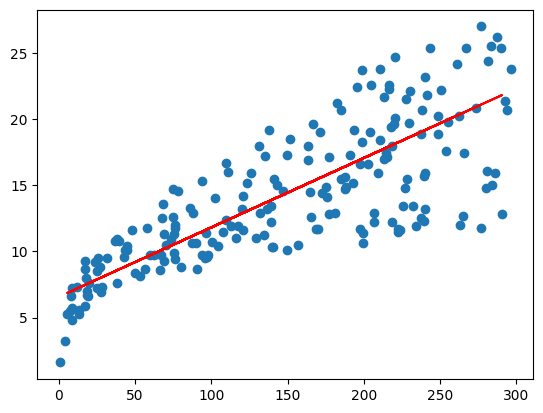

In [189]:
plt.scatter(df['TV'],df['Sales'])
plt.plot(X_test, olslr_pred, c = 'r')

# Part-2

### R2 Score
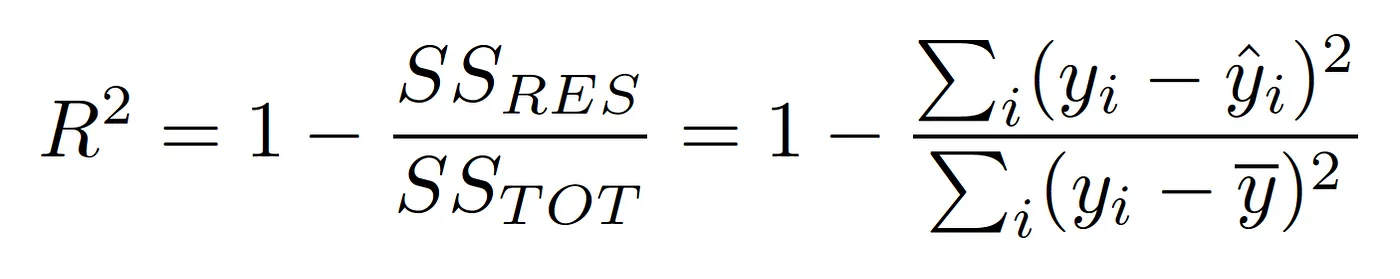

### MEAN ABSOLUTE ERROR
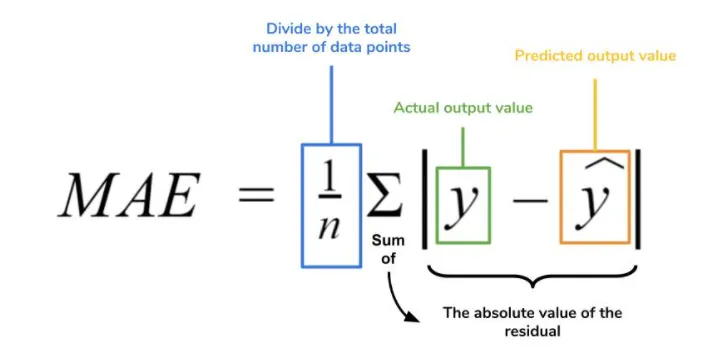

### ROOT MEAN SQUARED ERROR
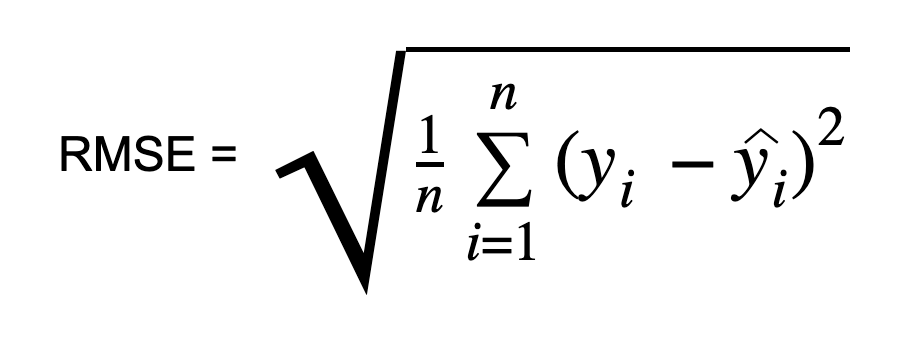

### Evaluation time
Let's see how does both of our models perform.

In [190]:
# Implement R2 Score, MAE and RMSE
import math

class evaluate:

  def __init__(self,y_pred,y_test):
    self.y_pred = np.array(y_pred)
    self.y_test = np.array(y_test)

  def r2score(self):
    #Write code here
    r2num =np.array((self.y_pred - self.y_test)**2)
    r2den = np.array((self.y_pred - np.mean(self.y_pred))**2)
    r2 = 1 - (np.sum(r2num)/np.sum(r2den))
    return r2

  def mae(self):
    mae_error_num = (np.array(abs(self.y_pred - self.y_test)))
    mae_error_den = len(np.array(self.y_pred))
    mae_error = (np.sum(mae_error_num))/mae_error_den
    #Write code here
    return mae_error

  def rmse(self):
    rmse_num = np.array((self.y_pred - self.y_test)**2)
    rmse_den = len(np.array(self.y_pred))
    rmse = math.sqrt(np.sum(rmse_num)/rmse_den)
    #write code here
    return rmse

In [191]:
# First calculate all the metrics for olslr_pred
ols_eval = evaluate(olslr_pred, y_test)
r2score_ols = ols_eval.r2score()
mae_ols = ols_eval.mae()
rmse_ols = ols_eval.rmse()

In [192]:
r2score_ols

0.12000870044293754

In [193]:
mae_ols

3.235531829171298

In [194]:
rmse_ols

4.218401341683507

In [195]:
# Now for gdlr_pred
gd_eval = evaluate(gdlr_pred, y_test)
r2score_gd = gd_eval.r2score()
mae_gd = gd_eval.mae()
rmse_gd = gd_eval.rmse()

In [196]:
r2score_gd

0.06577968686925872

In [197]:
mae_gd

3.215681379379106

In [198]:
rmse_gd

4.181429612695129

# Part-3
In this part you'll have to answer the questions provided in the below google form:

[Questions](https://forms.gle/2KfpQNvmf5fd9MTw9)

**After Submitting the form, you are required to paste the screenshot of the form.**

## Steps to add screenshot:


1.   Take the screenshot of the submitted form.
2.   Now create a text block below this block in whichever IDE you are using, for example, if you are using VS Code, you will get 2 options below and above each block, Code and Markdown, chose the **Markdown** one.
3.   Now insert the image and run the cell.

### Voila!



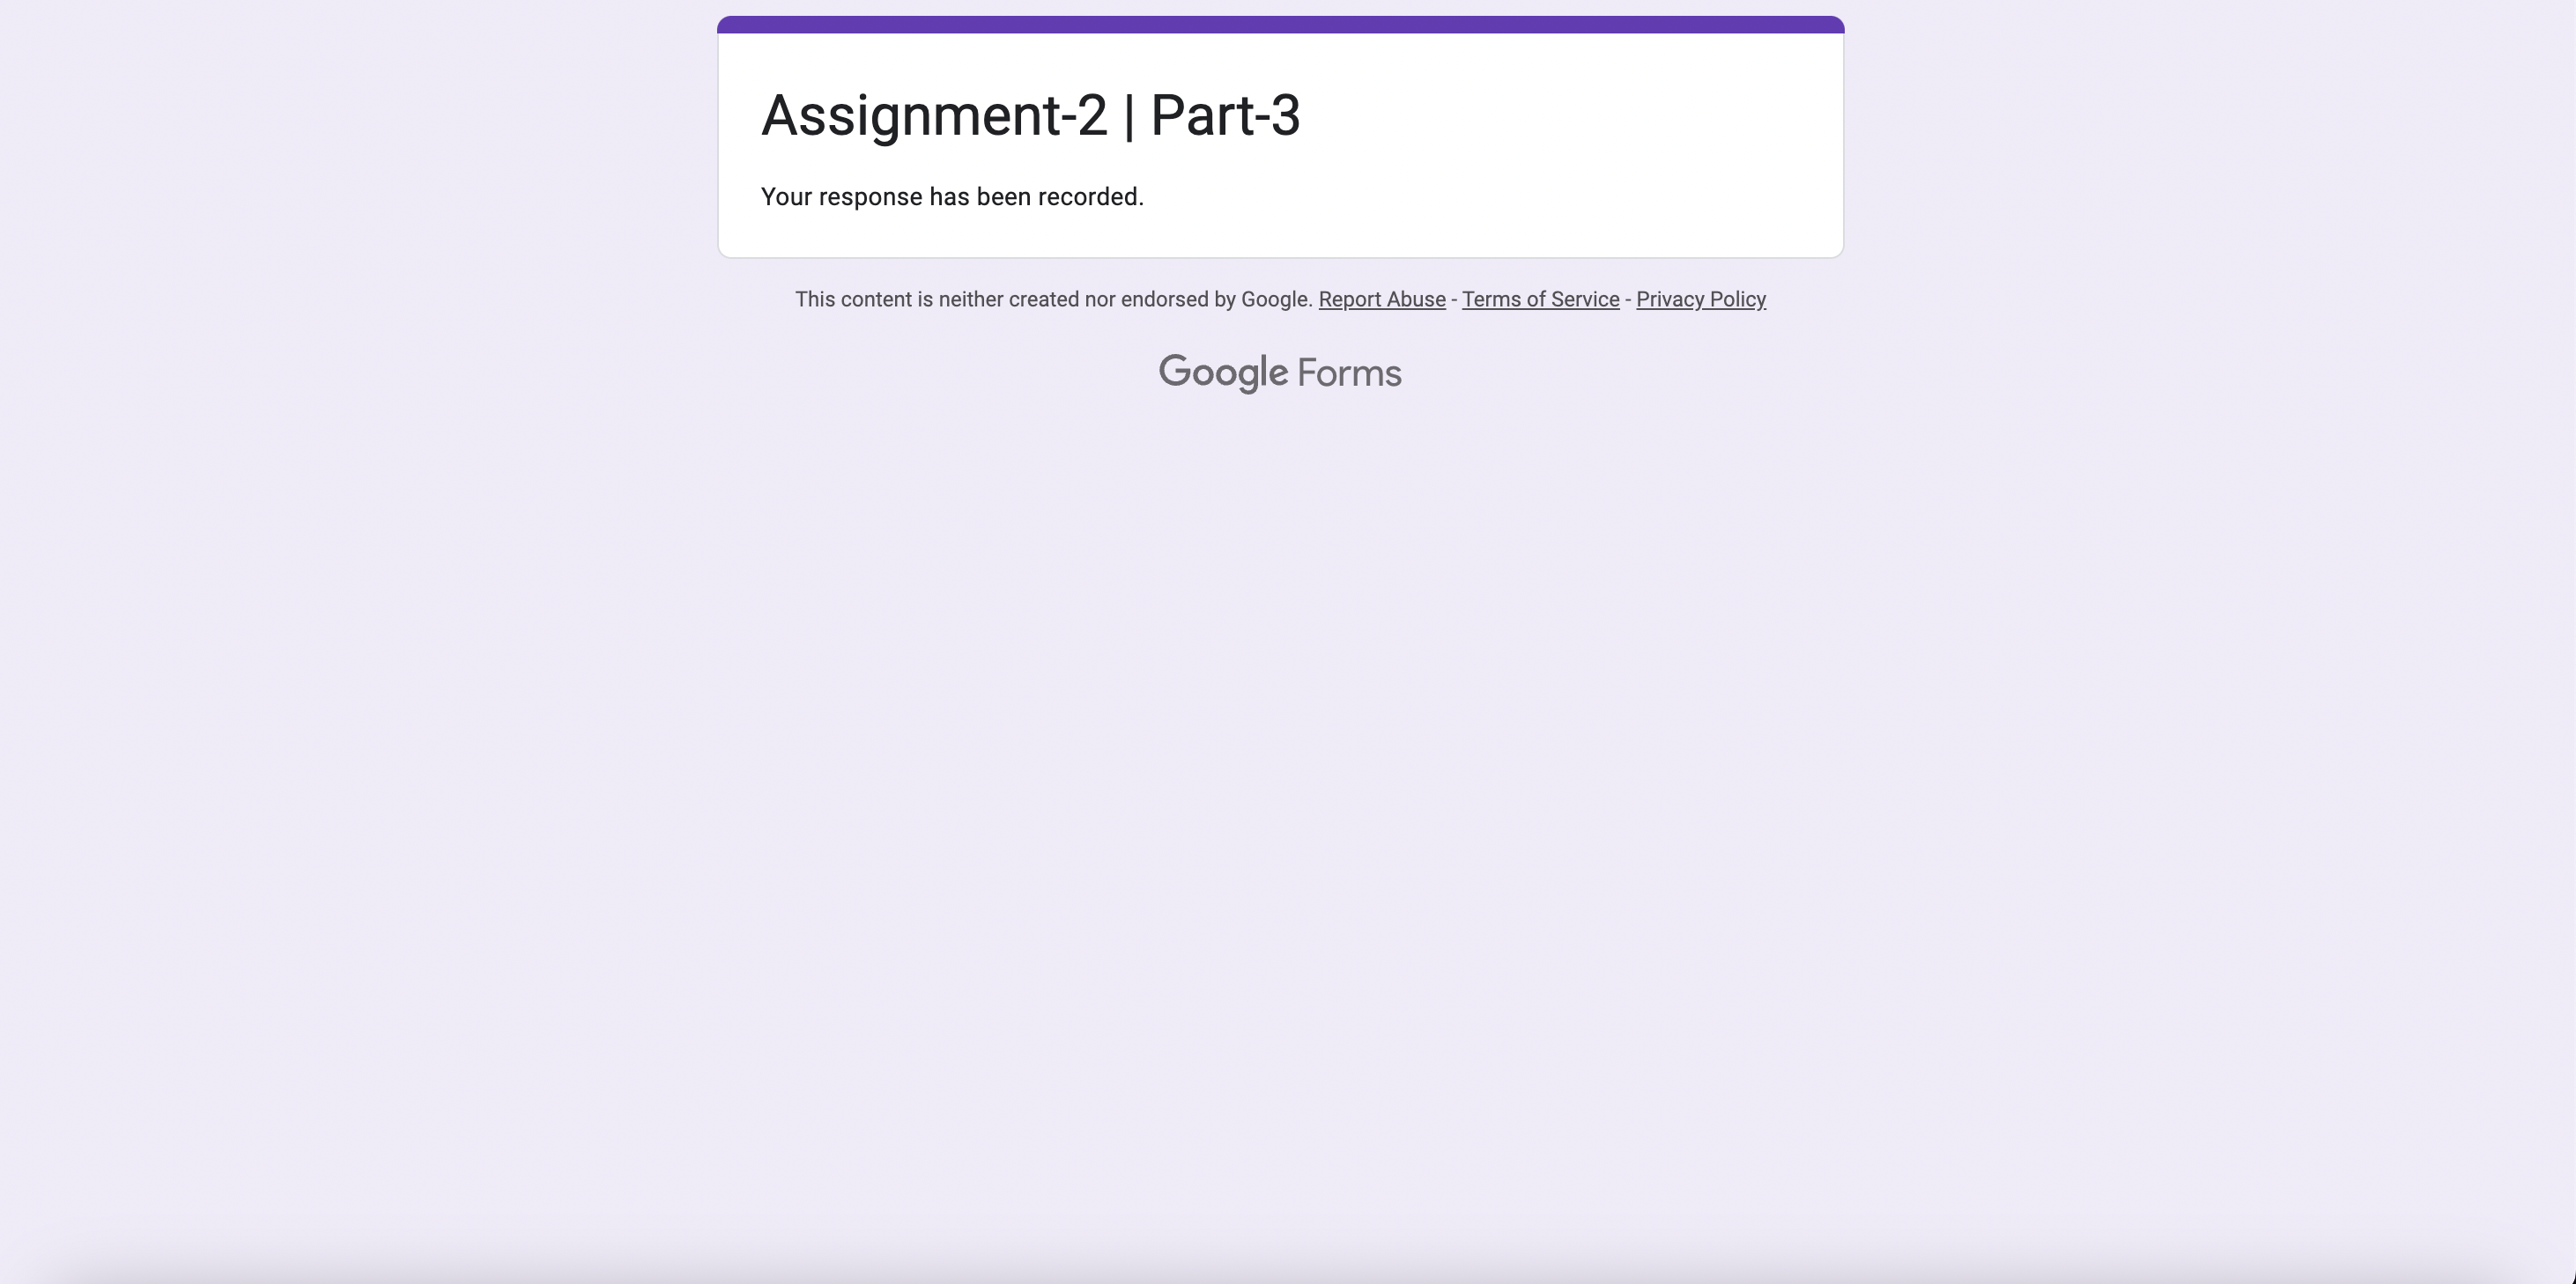